In [1]:
import  os
import cv2
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tqdm import tqdm
from keras.layers import BatchNormalization

In [4]:
import os
import cv2
import numpy as np

categories = os.listdir('C:/Users/YOGESH V/Desktop/AFYP/food20dataset/test_set')
img_size = 256

def get_data(data_dir):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

train = get_data('C:/Users/YOGESH V/Desktop/AFYP/food20dataset/train_set')  
val = get_data('C:/Users/YOGESH V/Desktop/AFYP/food20dataset/test_set')


In [5]:
x_train = []
y_train = []
x_val = []
y_val = []

In [6]:
for feature, label in train:
    x_train.append(feature)
    y_train.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)
    
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size,img_size,1)
y_train = np.array(y_train)

x_val.reshape(-1,img_size,img_size,1)
y_val = np.array(y_val)

In [7]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 16)      1216      
                                                                 
 batch_normalization (Batch  (None, 252, 252, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 16)      0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 126, 126, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 32)       

In [10]:
opt = Adam(lr =0.0001)
model.compile(optimizer = opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

In [11]:
history = model.fit(x_train,y_train, epochs = 10, validation_data=(x_val,y_val))

Epoch 1/10


C:\Users\YOGESH V\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


44/44 [==============================] - 129s 3s/step - loss: 4.4618 - accuracy: 0.0514 - val_loss: 3.1994 - val_accuracy: 0.0250
Epoch 2/10
44/44 [==============================] - 105s 2s/step - loss: 3.7560 - accuracy: 0.0593 - val_loss: 3.1483 - val_accuracy: 0.0567
Epoch 3/10
44/44 [==============================] - 97s 2s/step - loss: 3.4073 - accuracy: 0.0621 - val_loss: 3.4283 - val_accuracy: 0.0400
Epoch 4/10
44/44 [==============================] - 94s 2s/step - loss: 3.3826 - accuracy: 0.0657 - val_loss: 3.1689 - val_accuracy: 0.0683
Epoch 5/10
44/44 [==============================] - 88s 2s/step - loss: 3.2799 - accuracy: 0.0900 - val_loss: 3.1498 - val_accuracy: 0.0683
Epoch 6/10
44/44 [==============================] - 87s 2s/step - loss: 3.2231 - accuracy: 0.0986 - val_loss: 3.1596 - val_accuracy: 0.0717
Epoch 7/10
44/44 [==============================] - 80s 2s/step - loss: 3.1377 - accuracy: 0.0843 - val_loss: 2.9975 - val_accuracy: 0.0967
Epoch 8/10
44/44 [===========

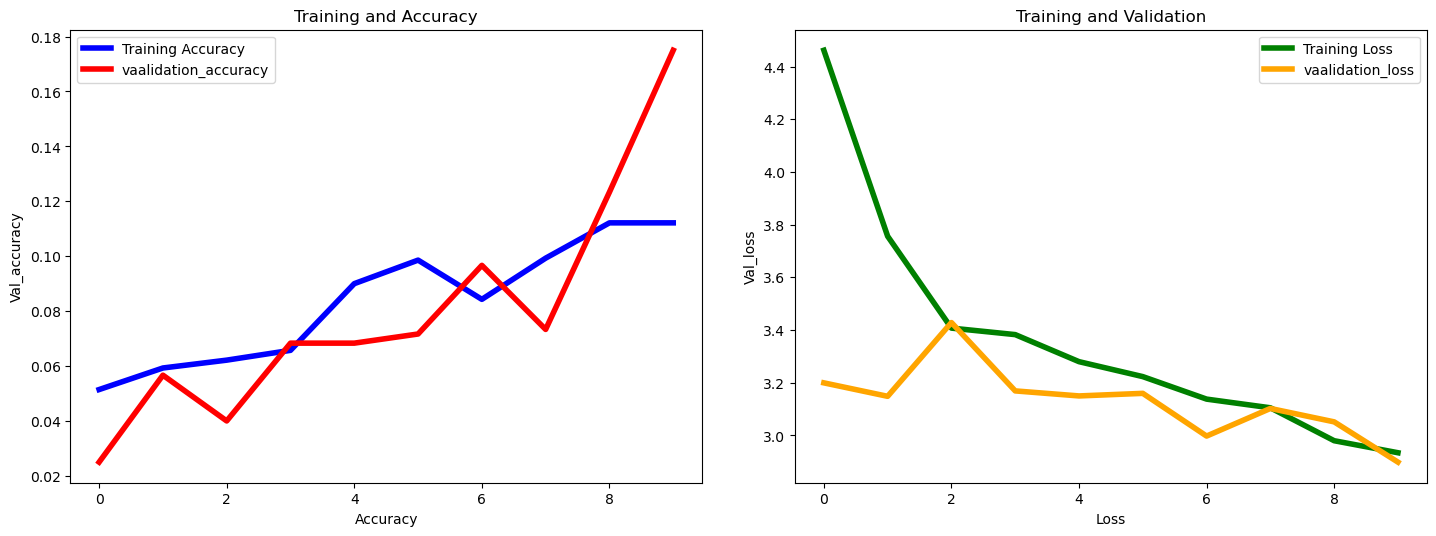

In [12]:
epochs_range = range(10)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
ax1.plot(epochs_range,acc,label='Training Accuracy',c='blue',linewidth = 4)
ax1.plot(epochs_range,val_acc, label='vaalidation_accuracy',c='red',linewidth=4)
ax1.legend()
ax1.set_title('Training and Accuracy')
ax1.set_xlabel('Accuracy', fontsize=10)
ax1.set_ylabel('Val_accuracy', fontsize=10)


ax2.plot(epochs_range,loss,label='Training Loss',c='green',linewidth = 4)
ax2.plot(epochs_range,val_loss, label='vaalidation_loss',c='orange',linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation')
ax2.set_xlabel('Loss', fontsize=10)
ax2.set_ylabel('Val_loss', fontsize=10)

fig.tight_layout(pad=3.0)
plt.show()

In [14]:
predictions = model.predict(x_val)

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_val, predicted_labels, target_names=categories))


19/19 [==============================] - 5s 255ms/step
                  precision    recall  f1-score   support

        biriyani       0.14      0.03      0.05        30
    bisibelebath       0.07      0.03      0.05        30
      butternaan       0.33      0.07      0.11        30
           chaat       0.20      0.10      0.13        30
        chappati       0.00      0.00      0.00        30
          dhokla       0.09      0.03      0.05        30
            dosa       0.04      0.03      0.04        30
     gulab jamun       0.23      0.30      0.26        30
           halwa       0.22      0.40      0.28        30
            idly       0.36      0.57      0.44        30
      kathi roll       0.10      0.10      0.10        30
       meduvadai       0.24      0.30      0.27        30
         noodles       0.50      0.13      0.21        30
       paniyaram       0.22      0.17      0.19        30
           poori       0.11      0.23      0.15        30
          samosa

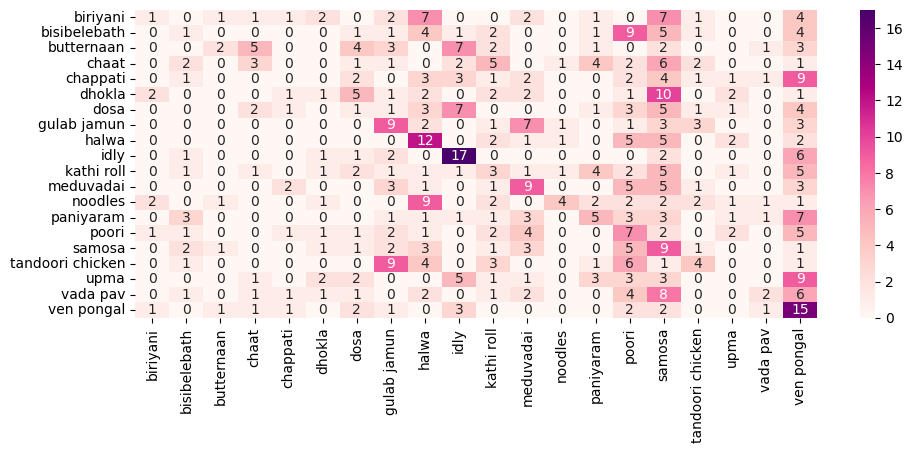

In [15]:
y_val = y_val.astype(int)
predicted_labels = predicted_labels.astype(int)

cm1 = confusion_matrix(y_val, predicted_labels)

df_cm = pd.DataFrame(cm1, index=categories, columns=categories)

plt.figure(figsize=(11, 4))

sns.heatmap(df_cm, annot=True, cmap='RdPu')
plt.show()

In [16]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (256,256,3), include_top=False, weights='imagenet')

base_model.trainable=False

model = tf.keras.Sequential(
        [base_model, 
         tf.keras.layers.GlobalAveragePooling2D(),
         tf.keras.layers.Dropout(0.2), 
         tf.keras.layers.Dense(20,activation='softmax')])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_7 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 20)                25620     
                                                                 
Total params: 2283604 (8.71 MB)
Trainable params: 25620 (100.08 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [17]:
base_learning_rate = 0.1

model.compile(optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = model.fit(x_train,y_train,epochs = 5, validation_data=(x_val,y_val))

Epoch 1/5


C:\Users\YOGESH V\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


44/44 [==============================] - 63s 1s/step - loss: 2.4978 - accuracy: 0.2571 - val_loss: 1.6481 - val_accuracy: 0.6100
Epoch 2/5
44/44 [==============================] - 53s 1s/step - loss: 1.3360 - accuracy: 0.6314 - val_loss: 1.1497 - val_accuracy: 0.7067
Epoch 3/5
44/44 [==============================] - 50s 1s/step - loss: 0.9545 - accuracy: 0.7543 - val_loss: 0.9696 - val_accuracy: 0.7433
Epoch 4/5
44/44 [==============================] - 49s 1s/step - loss: 0.7455 - accuracy: 0.8036 - val_loss: 0.8551 - val_accuracy: 0.7750
Epoch 5/5
44/44 [==============================] - 48s 1s/step - loss: 0.6120 - accuracy: 0.8464 - val_loss: 0.7685 - val_accuracy: 0.7850


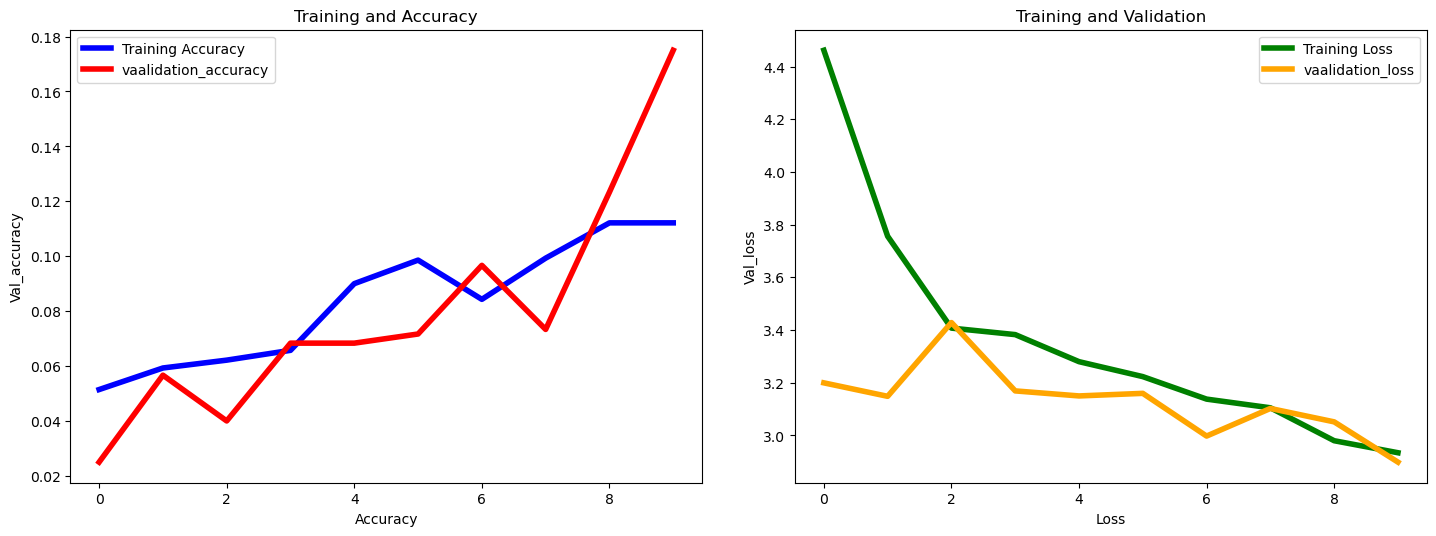

In [18]:
epochs_range = range(10)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
ax1.plot(epochs_range,acc,label='Training Accuracy',c='blue',linewidth = 4)
ax1.plot(epochs_range,val_acc, label='vaalidation_accuracy',c='red',linewidth=4)
ax1.legend()
ax1.set_title('Training and Accuracy')
ax1.set_xlabel('Accuracy', fontsize=10)
ax1.set_ylabel('Val_accuracy', fontsize=10)


ax2.plot(epochs_range,loss,label='Training Loss',c='green',linewidth = 4)
ax2.plot(epochs_range,val_loss, label='vaalidation_loss',c='orange',linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation')
ax2.set_xlabel('Loss', fontsize=10)
ax2.set_ylabel('Val_loss', fontsize=10)

fig.tight_layout(pad=3.0)
plt.show()

In [20]:
raw_predictions = model.predict(x_val)

prediction = raw_predictions.argmax(axis=-1)

prediction = prediction.reshape(1, -1)[0]

print(classification_report(y_val, prediction, target_names=categories))

19/19 [==============================] - 17s 826ms/step
                  precision    recall  f1-score   support

        biriyani       0.83      0.80      0.81        30
    bisibelebath       0.60      0.30      0.40        30
      butternaan       0.94      0.53      0.68        30
           chaat       0.59      0.77      0.67        30
        chappati       0.79      0.87      0.83        30
          dhokla       0.82      0.93      0.87        30
            dosa       0.79      0.73      0.76        30
     gulab jamun       0.88      0.97      0.92        30
           halwa       0.59      0.73      0.66        30
            idly       0.81      0.83      0.82        30
      kathi roll       0.81      0.97      0.88        30
       meduvadai       0.84      0.87      0.85        30
         noodles       0.93      0.90      0.92        30
       paniyaram       0.96      0.87      0.91        30
           poori       0.93      0.87      0.90        30
          samos

<Axes: >

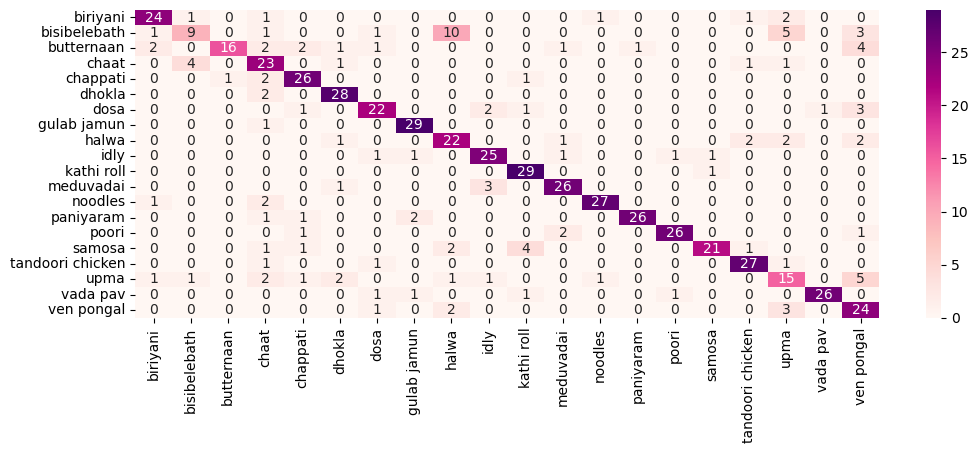

In [21]:
cm1 = confusion_matrix(y_val,prediction)
df_cm  = pd.DataFrame(cm1,index=[i for i in categories],columns = [i for i in categories])
plt.figure(figsize=(12,4))
import seaborn as ns
ns.heatmap(df_cm,annot=True,cmap='RdPu')

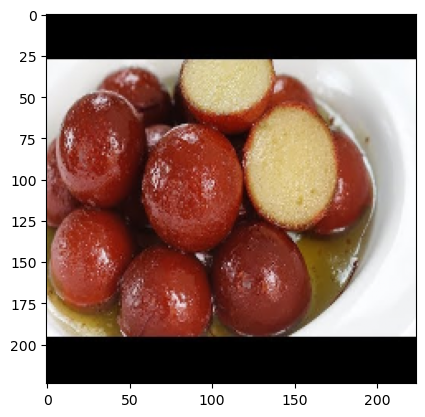

In [3]:
image_path = 'food2.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224)) 
image = image / 255.0 

plt.imshow(image)

In [4]:
raw_predictions = model.predict(np.expand_dims(image, axis=0))

prediction = raw_predictions.argmax(axis=-1)

# Display the result
print(f"Predicted Class: {prediction[0]}")

NameError: name 'model' is not defined

In [ ]:
['']